In [3]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import yfinance as yf

In [4]:
data=yf.download('PG',start='2000-1-1')['Adj Close']
                            

[*********************100%***********************]  1 of 1 completed


In [5]:
ret=np.log(1+data.pct_change())

In [6]:
import matplotlib.pyplot
from scipy.stats import norm
%matplotlib inline

<AxesSubplot:xlabel='Date'>

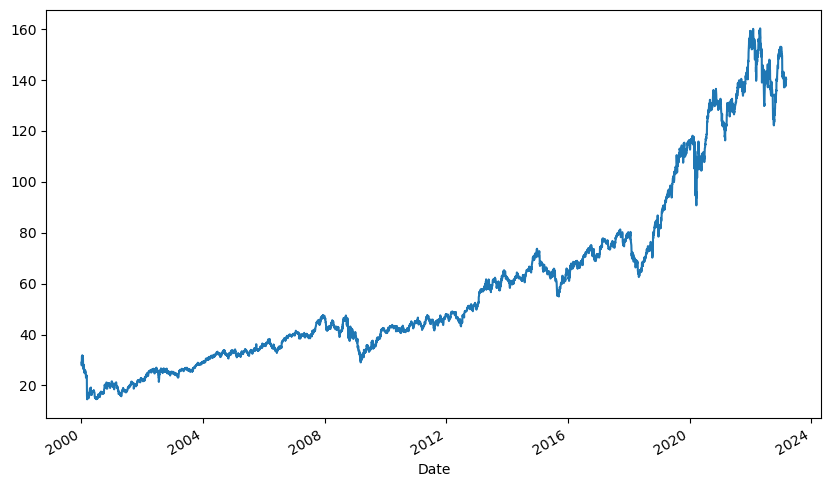

In [7]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

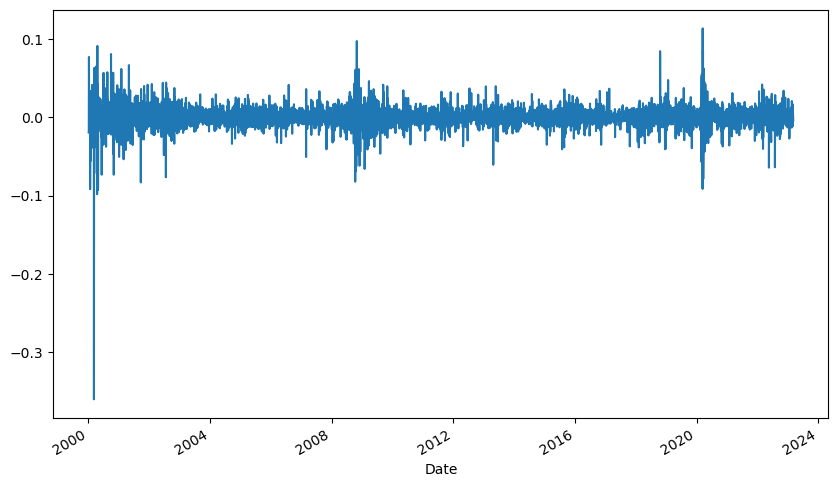

In [8]:
ret.plot(figsize=(10,6))

In [9]:
u=ret.mean()

In [10]:
var=ret.var()

In [11]:
drift=u-(0.5*var)
drift

0.0001779326534476919

In [12]:
std=ret.std()
std=np.array(std)
std

array(0.01362129)

In [13]:
type(drift)

float

In [14]:
np.array(drift)

array(0.00017793)

In [15]:
    norm.ppf(0.95)

1.6448536269514722

In [16]:
x=np.random.rand(10,2)
x

array([[0.33955862, 0.65654566],
       [0.13969048, 0.23079086],
       [0.44417309, 0.35605601],
       [0.14723824, 0.53107299],
       [0.13257717, 0.39387359],
       [0.63058613, 0.69075086],
       [0.87880069, 0.04578923],
       [0.57002101, 0.86841701],
       [0.36014201, 0.66987826],
       [0.71370597, 0.48099954]])

In [17]:
norm.ppf(x)

array([[-0.41366805,  0.40305375],
       [-1.08171099, -0.73624482],
       [-0.14039719, -0.36902107],
       [-1.04835194,  0.07796736],
       [-1.11429107, -0.26923717],
       [ 0.33340612,  0.4979798 ],
       [ 1.16901244, -1.6871295 ],
       [ 0.17642764,  1.11893943],
       [-0.35807923,  0.43957702],
       [ 0.56424404, -0.04764511]])

In [18]:
z=norm.ppf(x)

In [19]:
inter=1000
itera=10

In [20]:
daily_ret=np.exp(drift+std*norm.ppf(np.random.rand(inter,itera)))

In [21]:
daily_ret

array([[1.00804995, 0.99511217, 0.99262084, ..., 1.00240181, 1.02939691,
        1.02089744],
       [0.99114604, 0.99653105, 1.00050145, ..., 0.99495279, 1.00432658,
        1.0149595 ],
       [0.98659323, 1.00601644, 1.00265875, ..., 0.98557393, 0.99037772,
        1.00588487],
       ...,
       [0.99418733, 1.00373164, 0.97803912, ..., 0.99019378, 0.99142352,
        1.01039036],
       [0.99146959, 0.98322797, 0.98275281, ..., 1.02361126, 1.00259355,
        0.99649743],
       [1.00156136, 1.00120986, 1.00528264, ..., 1.02139467, 1.02005101,
        1.01958129]])

In [22]:
S0=data.iloc[-1]
S0

140.35000610351562

In [23]:
data.tail()

Date
2023-02-28    137.559998
2023-03-01    137.660004
2023-03-02    139.929993
2023-03-03    140.949997
2023-03-06    140.350006
Name: Adj Close, dtype: float64

In [24]:
pl=np.zeros_like(daily_ret)

In [25]:
pl[0]=S0
pl

array([[140.3500061, 140.3500061, 140.3500061, ..., 140.3500061,
        140.3500061, 140.3500061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [26]:
for t in range(1,1000):
    pl[t]=pl[t-1]*daily_ret[t]

In [27]:
pl

array([[140.3500061 , 140.3500061 , 140.3500061 , ..., 140.3500061 ,
        140.3500061 , 140.3500061 ],
       [139.10735252, 139.86313923, 140.42038527, ..., 139.64163024,
        140.95724227, 142.44957239],
       [137.24237248, 140.7046176 , 140.79372863, ..., 137.62714962,
        139.60091252, 143.28787   ],
       ...,
       [134.677454  , 142.46322447, 257.40827975, ..., 143.37102991,
        221.98571556, 212.70291437],
       [133.52860015, 140.07382653, 252.9687114 , ..., 146.75620078,
        222.5614463 , 211.95790743],
       [133.73708639, 140.24329556, 254.30505336, ..., 149.89600142,
        227.02402899, 216.10831682]])

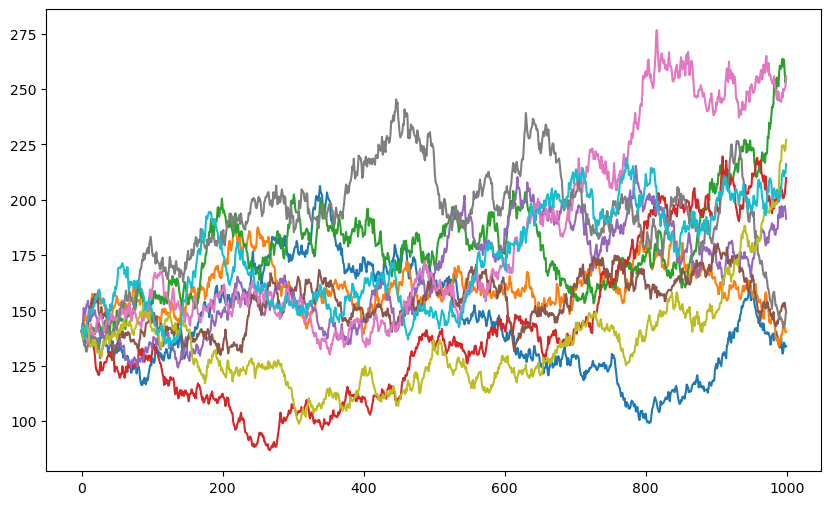

In [28]:
import matplotlib.pyplot as  plt
plt.figure(figsize=(10,6))
plt.plot(pl)